In [94]:
''' Make sure to use model-env virtual environment'''
# Run: model-env\Scripts\activate
# Sci-kit learn is a library better suited for tabular data than pytorch

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor # Regression model  
from sklearn.metrics import root_mean_squared_error # For evaluating the model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Loading the data

In [95]:
# using r string for escape character comprehension
data = r"C:\Users\user\Documents\My stuff\Hobbies\Programming\Projects\Kaggle Projects\House Prices - Advanced Regression Techniques\Data\data.csv"
dataset = pd.read_csv(data)
print("Full train dataset shape is {}".format(dataset.shape))


Full train dataset shape is (1460, 81)


In [96]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [97]:
dataset.describe().round(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.50,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.61,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.00,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.75,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.50,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.25,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.00,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


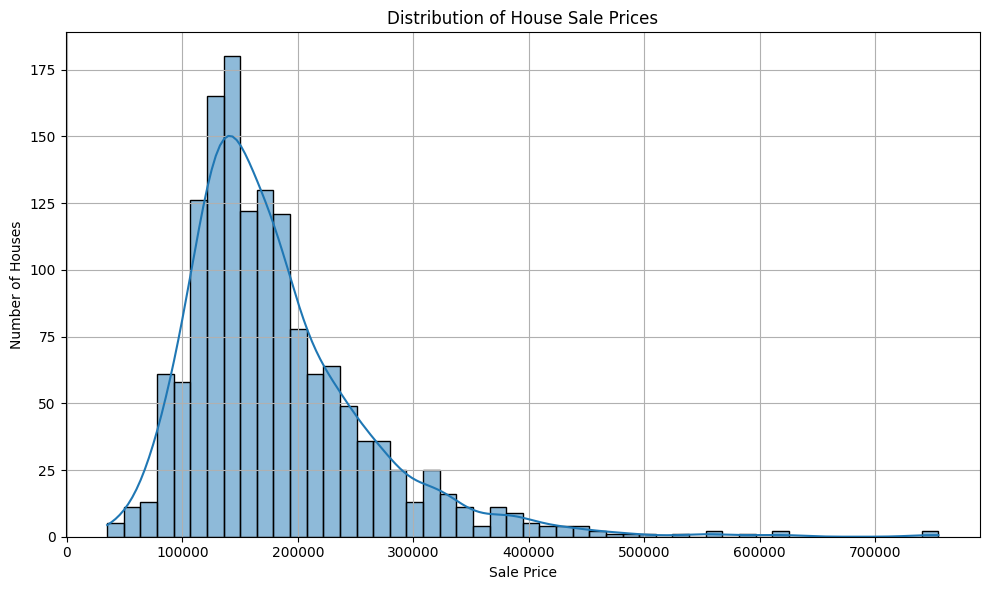

In [98]:
# Visualizing data before preprocessing
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='SalePrice', bins=50, kde=True)

plt.title('Distribution of House Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.tight_layout()
plt.show()

In [99]:
# Separate the target first
y = dataset['SalePrice']

# Now safely preprocess the features
features = dataset.drop('SalePrice', axis=1)
X = features.select_dtypes(include=[np.number]).dropna(axis=1)

In [100]:
X.head(10)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,706,0,150,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,978,0,284,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,486,0,434,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,216,0,540,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,655,0,490,...,836,192,84,0,0,0,0,0,12,2008
5,6,50,14115,5,5,1993,1995,732,0,64,...,480,40,30,0,320,0,0,700,10,2009
6,7,20,10084,8,5,2004,2005,1369,0,317,...,636,255,57,0,0,0,0,0,8,2007
7,8,60,10382,7,6,1973,1973,859,32,216,...,484,235,204,228,0,0,0,350,11,2009
8,9,50,6120,7,5,1931,1950,0,0,952,...,468,90,0,205,0,0,0,0,4,2008
9,10,190,7420,5,6,1939,1950,851,0,140,...,205,0,4,0,0,0,0,0,1,2008


Splitting data into training and test set

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=11)

Training the model

In [102]:
model = RandomForestRegressor(n_estimators=100,criterion='squared_error', random_state=11)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=11)

In [103]:
# Predict & Evaluate
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")

RMSE: 32962.56074853932


Generating solution

In [ ]:
output = pd.DataFrame({'Id':X_test['Id'],
                       'SalePrice':y_pred })

output.head()


,Id,SalePrice
127,128,98865.50
455,456,170972.67
1323,1324,74489.33
217,218,104657.30
1181,1182,276644.51


In [106]:
# Sample submission
output.to_csv("submission.csv", index=False)